# Tutorial: Systematic Literature Review

**Filter scientific publications**

In [226]:
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from pycproject.readctree import CProject
from pycproject.factnet import *
import os
from collections import Counter
from lxml import etree

%matplotlib inline

### Define functions used in the notebook

In [227]:
def filter_by_pubyears(cproject, startyear=0, endyear=3000):
    new_ctree = []
    for ctree in cproject.get_ctrees():
        pubyear = int(ctree.first_publication_date[0][0:4])
        if pubyear >= startyear and pubyear <= endyear:
            new_ctree.append(ctree)
    return new_ctree

### Reading in the datasets

In the next cell we read in the prepared data, which must be located in the ```zika/``` folder (we are already in this directory), into the notebook and assign it to the zika variable. This step stores all metadata and facts from every single publication downloaded in the first part and stores them in a [CProject](https://github.com/ContentMine/workshop-resources/tree/master/software-tutorials/cproject) object. Each CProject itself contains many `CTrees`, one for each publication, which are the building blocks of our dataset. So each CTree then contains the extracted facts and metadata of one scientific publication.

In [228]:
zika = CProject("", "zika") # empty path value means we are already in the root directory
print(zika.size)

1465


## Explore the whole corpus
This are the basic informations about the publications, and a good starting point to put the corpus in context.

### Explore the authors
Another interesting thing to know is, who are the most active reasearchers in the field. For this, we compute the most common authors for each corpus. First we get the complete list of authors ordered by number of works associated, which we then filter by the top n-authors. The value for how many authors you want to get shown can be adapted easily by changing the value for `num_authors`.

In [229]:
zika_authors = zika.get_authors()

# num_authors = len(authors) # set to this, if you want to see all authors listed up. Be ware, this can lead to a very long list in the browser window.
num_authors = 20 # change the value to your needs

for author in zika_authors.most_common()[:num_authors]:
    print(author)

('Faye O', 25)
('Weaver SC', 21)
('Sall AA', 19)
('Musso D', 13)
('Schmidt-Chanasit J', 12)
('Cao-Lormeau VM', 12)
('Li Y', 11)
('de Lamballerie X', 11)
('Osorio JE', 10)
('Rodriguez-Morales AJ', 10)
('Leparc-Goffart I', 10)
('Vasilakis N', 9)
('Failloux AB', 9)
('Wang Z', 9)
('Diallo M', 9)
('Aliota MT', 9)
('Liu Y', 9)
('Tesh RB', 9)
('Koopmans MP', 8)
('Ritchie SA', 8)


In [230]:
print('Number Zika authors:', len(zika_authors))

Number Zika authors: 9403


### Explore the journals

The final metadata we will have a look on is the journal, in which the publications are published. This is a good hint where we can find more research related publications. We again get the journals ordered by most mentions and print the top n out. 

In [231]:
zika_journals = zika.get_journals()

# num_authors = len(zika_journals) # set to this, if you want to see all authors listed up
num_journals = 20 # change the value to your needs

for journal in zika_journals.most_common()[:num_journals]:
    print(journal)

('PLoS neglected tropical diseases', 166)
('Emerging infectious diseases', 80)
('Scientific reports', 79)
('PloS one', 70)
('Parasites & vectors', 49)
('Bulletin of the World Health Organization', 40)
('PLoS pathogens', 30)
('Frontiers in microbiology', 30)
('BMC infectious diseases', 28)
('F1000Research', 23)
('PLoS currents', 22)
('Viruses', 22)
('Virology journal', 22)
('EBioMedicine', 20)
('Euro surveillance : bulletin Europeen sur les maladies transmissibles = European communicable disease bulletin', 19)
('mBio', 19)
('International journal of environmental research and public health', 17)
('The American journal of tropical medicine and hygiene', 17)
('Emerging Infectious Diseases', 16)
('Memorias do Instituto Oswaldo Cruz', 16)


### See the publication years
The timeline of the publication years gives an overview, how old the research field of Zika is, how many publications are made at all and how it is in comparison to the other corpuses. First we get a list with the number of publications for each year, which then gets plotted as a bar-chart. The chart is then saved as SVG-file.

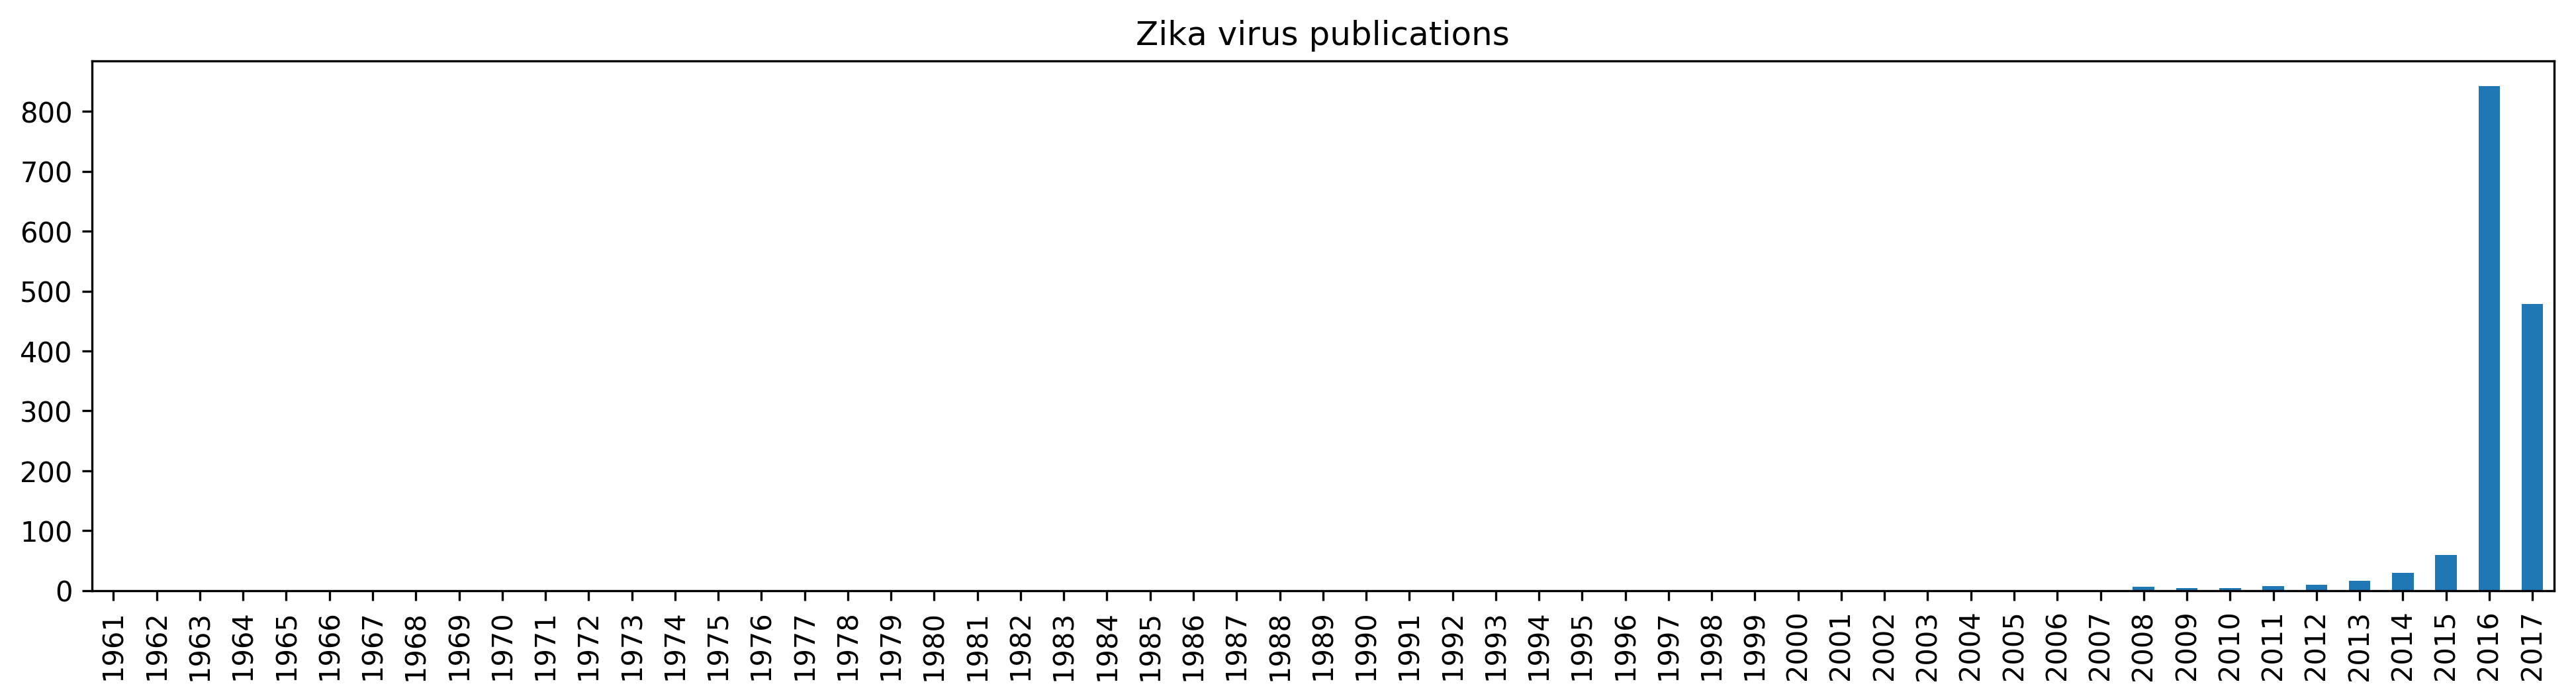

In [232]:
years = zika.get_pub_years()

fig = plt.figure(figsize=(16, 12), dpi=300)

# draw plot
ax1 = fig.add_subplot(3, 1, 1)
years.plot(kind='bar', ax=ax1)
ax1.set_title('Zika virus publications')


# save plot
plt.savefig('timeline.svg')

## Dive into the data and filter out
The normal workflow to start the selection process is, to:

1. Pre-select the data in regards to your research question
2. Have a look at the publications title
3. if relevant, have a look at the abstract
4. if relevant, have a look at the fulltext

So let's do this.

### Filter by year
Try out the timeframe offered by us (2000 - 2010, including 2000 and 2010). Then you can adjust the numbers to your needs and have a look at the outcome.

In [233]:
zika_timeframe = filter_by_pubyears(zika, 2000, 2010)
#zika_timeframe = filter_by_pubyears(zika, 2000, 2010)

for ctree in zika_timeframe:
    print('Article:', ctree.get_title(), ctree.ID)

Article: Universal primers that amplify RNA from all three flavivirus subgroups. PMC2263041
Article: Genetic and serologic properties of Zika virus associated with an epidemic, Yap State, Micronesia, 2007. PMC2600394
Article: Zika virus outside Africa. PMC2819875
Article: Sylvatic dengue virus type 2 activity in humans, Nigeria, 1966. PMC2570833
Article: Current quality of life and its determinants among opiate-dependent individuals five years after starting methadone treatment. PMC3023858
Article: The role of nutrient loading and eutrophication in estuarine ecology. PMC1240600
Article: Host range and emerging and reemerging pathogens. PMC3367654
Article: Constancy and diversity in the flavivirus fusion peptide. PMC2275255
Article: Magnetized solutions altered the absorbance of tramadol hcl: uv-spectrophotometer study. PMC3979174
Article: Conservation and variability of dengue virus proteins: implications for vaccine design. PMC2491585
Article: Isolation of a dengue type 1 virus from a

### Get publication title

In [234]:
pubIDs = ['PMC2600394', 'PMC3023858']
# pubIDs = ['PMC2600394']

ctree_ID = []

for ctree in zika_timeframe:
    for ID in pubIDs:
        if ctree.ID == ID:
            ctree_ID.append(ctree)

In [235]:
for ct in ctree_ID:
    print('Article:', ct.get_title(), '\n')

Article: Genetic and serologic properties of Zika virus associated with an epidemic, Yap State, Micronesia, 2007. 

Article: Current quality of life and its determinants among opiate-dependent individuals five years after starting methadone treatment. 



### Get abstract

In [236]:
for ct in ctree_ID:
    print('Abstract:', ct.metadata['abstractText'][0], '\n')

Abstract: Zika virus (ZIKV) is a mosquito-borne flavivirus first isolated in Uganda from a sentinel monkey in 1947. Mosquito and sentinel animal surveillance studies have demonstrated that ZIKV is endemic to Africa and Southeast Asia, yet reported human cases are rare, with <10 cases reported in the literature. In June 2007, an epidemic of fever and rash associated with ZIKV was detected in Yap State, Federated States of Micronesia. We report the genetic and serologic properties of the ZIKV associated with this epidemic. 

Abstract: PURPOSE: This study explores the current QoL of opiate-dependent individuals who started outpatient methadone treatment at least 5 years ago and assesses the influence of demographic, psychosocial, drug and health-related variables on individuals' QoL. METHODS: Participants (n = 159) were interviewed about their current QoL, psychological distress and severity of drug-related problems, using the Lancashire Quality of Life Profile, the Brief Symptom Inventor

### Get authors

In [237]:
for ct in ctree_ID:
    print('Authors:')
    for author in ct.metadata['authorList'][0]['author']:
        print(author['firstName'][0], author['lastName'][0])
    print('\n')

Authors:
Robert S Lanciotti
Olga L Kosoy
Janeen J Laven
Jason O Velez
Amy J Lambert
Alison J Johnson
Stephanie M Stanfield
Mark R Duffy


Authors:
Jessica De Maeyer
Wouter Vanderplasschen
Jan Lammertyn
Chijs van Nieuwenhuizen
Bernard Sabbe
Eric Broekaert




### Get list of keywords

In [238]:
for ct in ctree_ID:
    print('List of keywords:')
    for word in ct.get_keywords():
        print(word)
    print('\n')

List of keywords:
Zika virus
laboratory diagnosis
RT-PCR
flavivirus
serology
research


List of keywords:
Quality of life
Opiate dependence
Substitution treatment
Methadone maintenance treatment
Drug abuse
Determinants




### Get fulltext

In [239]:
for ct in ctree_ID:
    et = ct.get_fulltext_xml()
    print('Fulltext:', etree.tostring(et, pretty_print=True), '\n')

Fulltext: b'<!DOCTYPE article PUBLIC "-//NLM//DTD Journal Archiving and Interchange DTD v2.3 20070202//EN" "archivearticle.dtd">\n<article xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:mml="http://www.w3.org/1998/Math/MathML" article-type="research-article" xml:lang="EN">\n  <front>\n    <journal-meta>\n      <journal-id journal-id-type="nlm-ta">Emerg Infect Dis</journal-id>\n      <journal-id journal-id-type="publisher-id">EID</journal-id>\n      <journal-title>Emerging Infectious Diseases</journal-title>\n      <issn pub-type="ppub">1080-6040</issn>\n      <issn pub-type="epub">1080-6059</issn>\n      <publisher>\n        <publisher-name>Centers for Disease Control and Prevention</publisher-name>\n      </publisher>\n    </journal-meta>\n    <article-meta>\n      <article-id pub-id-type="pmcid">2600394</article-id>\n      <article-id pub-id-type="publisher-id">08-0287</article-id>\n      <article-id pub-id-type="doi">10.3201/eid1408.080287</article-id>\n      <article-id pub-id-ty

### Get doi

In [240]:
for ct in ctree_ID:
    print('doi:', ct.metadata['doi'][0])

doi: 10.3201/eid1408.080287
doi: 10.1007/s11136-010-9732-3


## Explore the facts extracted
This is specific to bio-sciences.

### Import facts as a graph

In [241]:
B_genus, genus_fact_graph, genus_paper_graph, genus_fact_nodes, genus_paper_nodes = create_network(zika, "species", "genus")

### Filter out 20 papers with most species mentioned

In [242]:
start_with = 0 # enter a number here
how_many = 20 # # this will give us the next 10
degreeCent = nx.algorithms.degree_centrality(B_genus)
for node in sorted(degreeCent, key=degreeCent.get, reverse=True)[start_with:start_with+how_many]:
    print(len(B_genus.neighbors(node)), node)

363 Aedes
137 Flaviviridae
136 Flavivirus
92 Culex
73 Vascular plant biodiversity of the lower Coppermine River valley and vicinity (Nunavut, Canada): an annotated checklist of an Arctic flora.
71 Wolbachia
66 Anopheles
50 Drosophila
41 Plasmodium
39 Ribosomal frameshifting and transcriptional slippage: From genetic steganography and cryptography to adventitious use.
34 An updated checklist of mosquito species (Diptera: Culicidae) from Madagascar.
33 Making Mosquito Taxonomy Useful: A Stable Classification of Tribe Aedini that Balances Utility with Current Knowledge of Evolutionary Relationships.
30 Comparative analysis of gut microbiota of mosquito communities in central Illinois.
30 Microbial control of arthropod-borne disease.
29 Togaviridae
24 Alphavirus
22 DNA Microarray Platform for Detection and Surveillance of Viruses Transmitted by Small Mammals and Arthropods.
21 DNA barcodes from four loci provide poor resolution of taxonomic groups in the genus Crataegus.
19 ESMO / ASCO Rec

### Filter out papers with less than 3 species mentioned

In [243]:
threshold_species = 2 # enter a number here
for node in sorted(degreeCent, key=degreeCent.get, reverse=False):
    if len(B_genus.neighbors(node)) > threshold_species:
        break
    print(len(B_genus.neighbors(node)), node)

1 Zaire
1 T Cell-Mediated Immunity towards Yellow Fever Virus and Useful Animal Models.
1 A Literature Review of Zika Virus.
1 Brachytherapy
1 Gzmb
1 Streptococcus
1 Nelorpivirus
1 Borrelia
1 Dictyostelium
1 Plamsmodial
1 Neonatal pigs are susceptible to experimental Zika virus infection.
1 Larvae
1 Haemagoggus
1 Dengue research: a bibliometric analysis of worldwide and Arab publications during 1872-2015.
1 Lysinibacillus
1 Prospects for dengue vaccines for travelers.
1 Mapping Zika virus infection using geographical information systems in Tolima, Colombia, 2015-2016.
1 Sclerotinia
1 Unskilled
1 Variation in Aedes aegypti Mosquito Competence for Zika Virus Transmission.
1 Points
1 Cytomegalovirus
1 Prompter
1 Vector-borne infections.
1 Antiviral Activity of a Novel Compound CW-33 against Japanese Encephalitis Virus through Inhibiting Intracellular Calcium Overload.
1 Histomonas
1 Tenericutes
1 Bulletin
1 Avulavirus
1 Neonatal encephalitis due to Chikungunya vertical transmission: First

In [244]:
start_with = 0 # pick a number between 1 and 50
how_many = 1 # choose the number of communities you want to plot between 1 and 5. More takes a lot of space in your notebook
subgraphs = sorted(nx.connected_component_subgraphs(genus_fact_graph), key=len, reverse=True)[start_with:start_with+how_many]
for idx, sg in enumerate(subgraphs):
    degreeCent = nx.algorithms.degree_centrality(sg)
    print(max(degreeCent, key=degreeCent.get))
    save_graph(sg, "orange", 'local-community-'+str(idx + 1)) # choose a color, e.g. red, blue, green, ...

Aedes


ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')